In [7]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

wl = np.linspace(400, 700, 301)
R_scan_05 = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values
R_scan_15 = pd.read_csv('./spectrum/LENS/rev1/R_15_B.csv')['SCAN'].values
R_scan_30 = pd.read_csv('./spectrum/LENS/rev1/R_30_B.csv')['SCAN'].values
# open material (LENS)
air = ml.Non_Dispersion(1)
ITO_L = ml.open_material('ITO_LENS', 'Sellmeier')
OC = ml.open_material('OC_LENS', 'Material')
sodalime = ml.open_material('sodalime_Nanya', 'Material')
sodalime_LENS = ml.Non_Dispersion(1.65)
ITO = ml.Cauchy([1.640727, 0.050604], ITO_L.k, ITO_L.wl_k)
SiN = ml.Cauchy([1.97812451, 0.0100578])
SiO2 = ml.Cauchy([1.50818418, 0.00141496727])

#SiO2.k = 10**-5
#SiN.k = 10**-5
#OC.k = 10**-5

# hypothesis
R_hypo_tra = lambda th: tm.Design(
    [air, OC, SiN, SiO2, SiO2, SiN, sodalime_LENS],
    [None, th[0], th[1], th[2], th[4], th[5], None]
).reflectance(wl, 5)

R_hypo_05 = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime_LENS],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

R_hypo_15 = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime_LENS],
    [None, th[0], th[1],  th[2], th[3], th[4], th[5], None]
).reflectance(wl, 15)

R_hypo_30 = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime_LENS],
    [None, th[0], th[1],  th[2], th[3], th[4], th[5], None]
).reflectance(wl, 30)

def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

In [8]:
# fitting (LENS)
FOM = lambda th: RMSE(
    100*R_hypo_05(th),R_scan_05, 301
)+np.mean(
    110*abs(R_hypo_tra(th)-R_hypo_05(th))
)

In [11]:
sol = differential_evolution(
    FOM, [
        (1600, 2600), (4, 20), (20, 60), (20, 40), (20, 60), (4, 20)
    ],
    disp = True, 
    polish = True, 
    popsize = 30, 
    mutation = 0.5, 
    recombination = 1, 
    strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 1.08006
differential_evolution step 2: f(x)= 0.878858
differential_evolution step 3: f(x)= 0.620711
differential_evolution step 4: f(x)= 0.617284
differential_evolution step 5: f(x)= 0.590974
differential_evolution step 6: f(x)= 0.577271
differential_evolution step 7: f(x)= 0.550904
differential_evolution step 8: f(x)= 0.549578
differential_evolution step 9: f(x)= 0.544829
differential_evolution step 10: f(x)= 0.543893
differential_evolution step 11: f(x)= 0.543126
differential_evolution step 12: f(x)= 0.54183
differential_evolution step 13: f(x)= 0.541626
[1711.19921885   15.46607491   22.39302736   20.           22.39827995
   14.81233805]


1.121366360077359


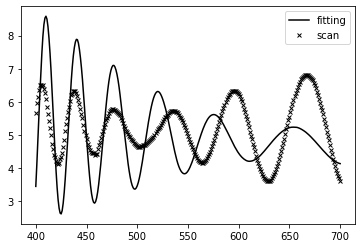

1.2085230162198053


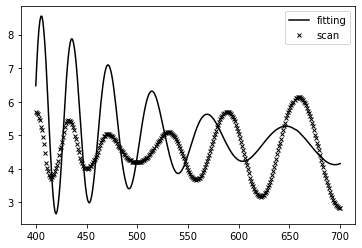

1.1259159233080014


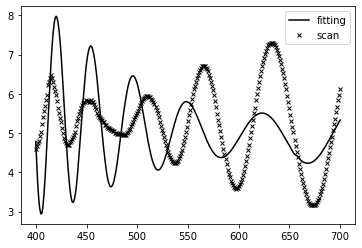

In [10]:
def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

f2 = [1707,12,27.1,20,37.1,12]
f3 = [2122.28929493,14.71580371,36.65970178,32.,45.,8.62266763]
f4 = [1729.79214328,14.48240497,38.032268,29.89295768,46.99689601,6.5993801 ]
f5 = [1728.01115927,14.3870235,38.11820806,29.69018659,46.6469324,6.95233569]
f6 = [1717.37238713,14.44418993,32.21384678,22.66133977,33.72499576,9.04278654]
f7 = [1709.56382882,13.49562472,25.06644048,20.00613518,35.05068117,12.78743588]
f8 = [2117.09108374,14.03410354,24.00942311,20.01956687,23.09031351,14.26167513]
tk = f7

plt.plot(wl, 100*R_hypo_05(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_05, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_reflection_blacktap_05.png')
print(RMSE(100*R_hypo_05(tk),R_scan_05, 301))
plt.show()

plt.plot(wl, 100*R_hypo_15(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_15, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_reflection_blacktap_15.png')
print(RMSE(100*R_hypo_15(tk),R_scan_15, 301))
plt.show()

plt.plot(wl, 100*R_hypo_30(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_30, 'kx', label = 'scan', markersize = 4)
plt.legend(loc = 'best')
#plt.savefig('LENS_rev1_reflection_blacktap_30.png')
print(RMSE(100*R_hypo_30(tk),R_scan_30, 301))
plt.show()

In [ ]:
plt.plot(wl, 100*R_hypo_05(tk), '-k', label = 'xy-ITO')
plt.plot(wl, 100*R_hypo_tra(tk), '-b', label = 'pattern')
plt.legend(loc = 'best')
print(np.mean(abs(100*(R_hypo_05(tk)-R_hypo_tra(tk)))))
plt.show()